Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Loading data

In [ ]:
train = pd.read_csv('/content/train (1).csv')
test = pd.read_csv('/content/test.csv')


Performing Exploratory data analysis(EDA)

In [ ]:
train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [ ]:
train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
print(train.isnull().sum())

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64


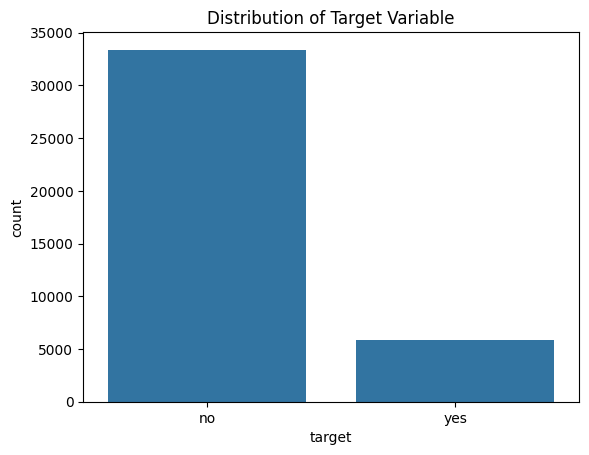

target
no     0.851394
yes    0.148606
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='target', data=train)
plt.title("Distribution of Target Variable")
plt.show()

print(train['target'].value_counts(normalize=True))


Bar plot

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


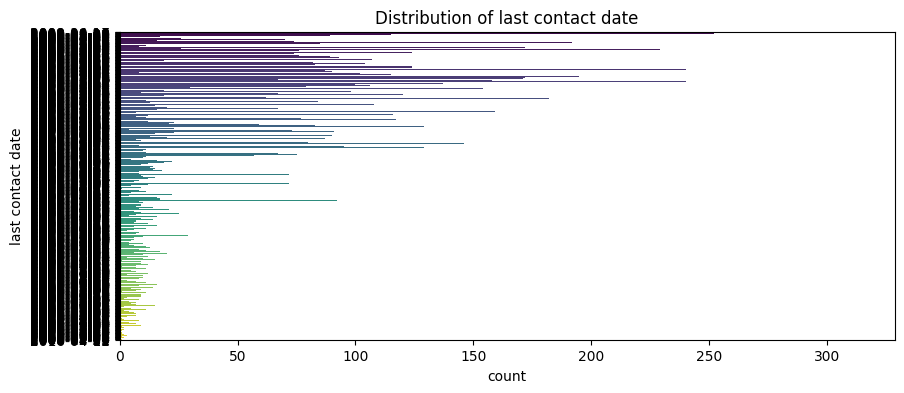

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


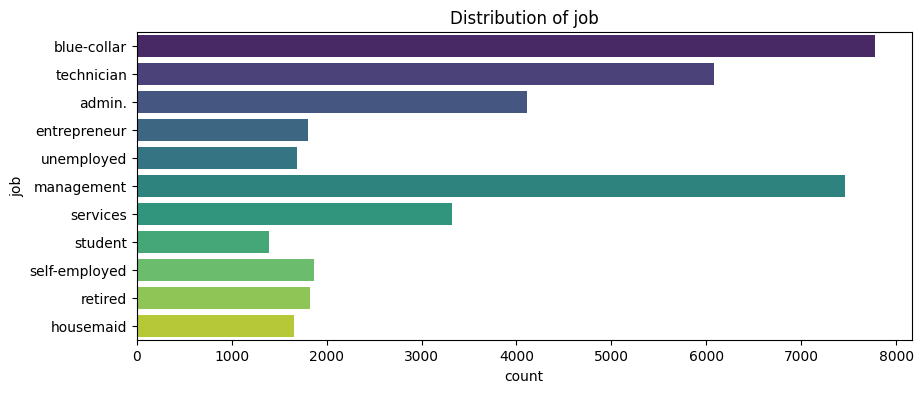

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


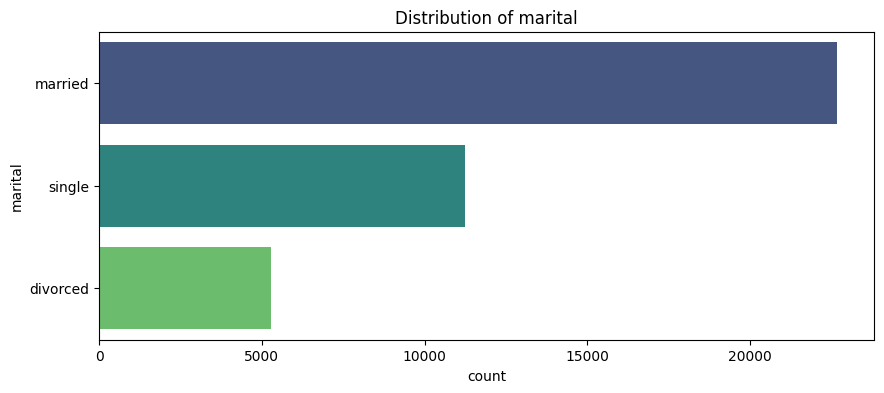

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


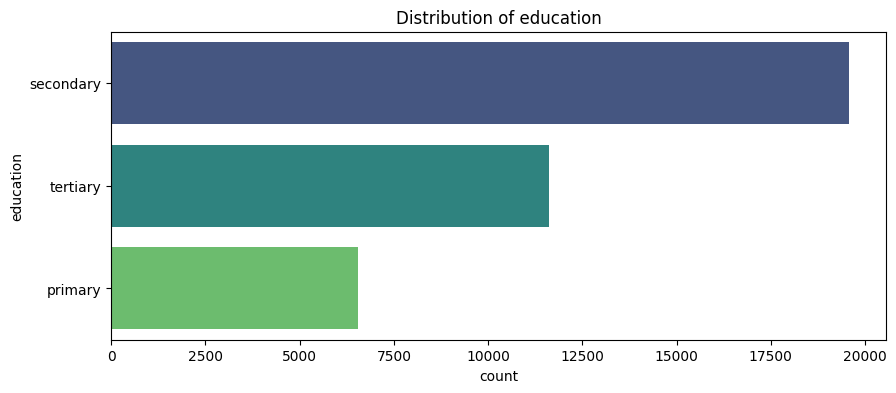

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


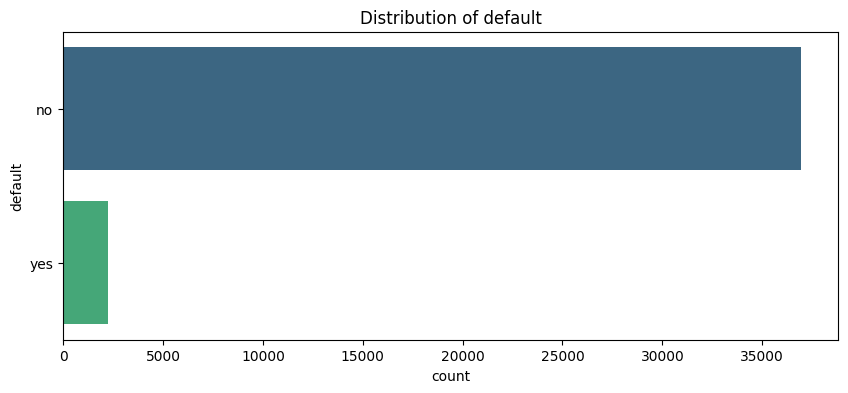

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


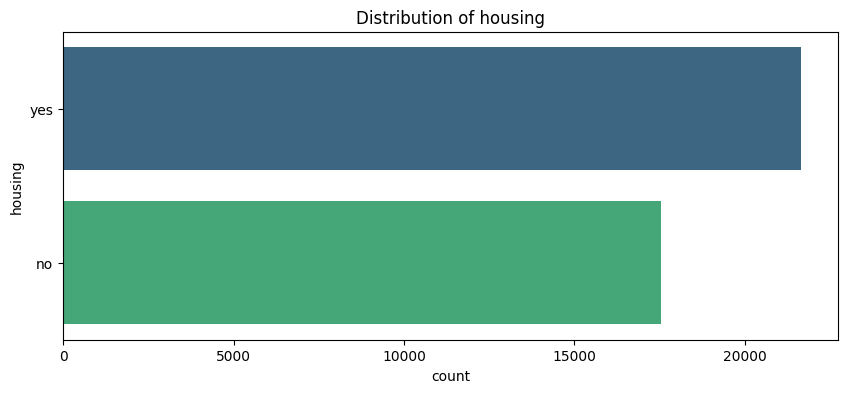

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


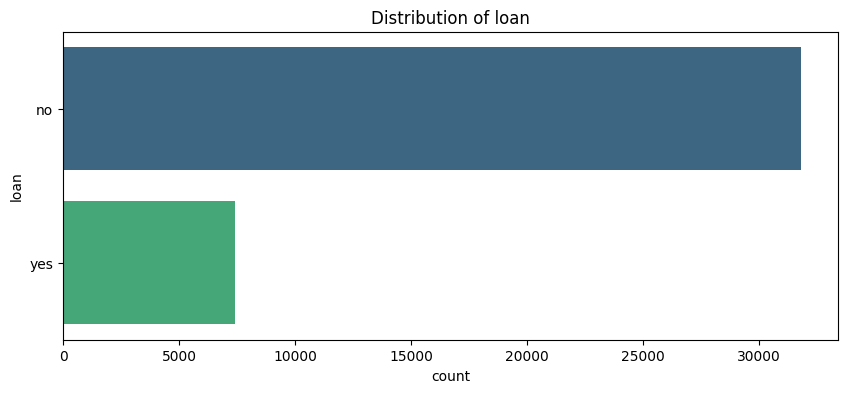

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


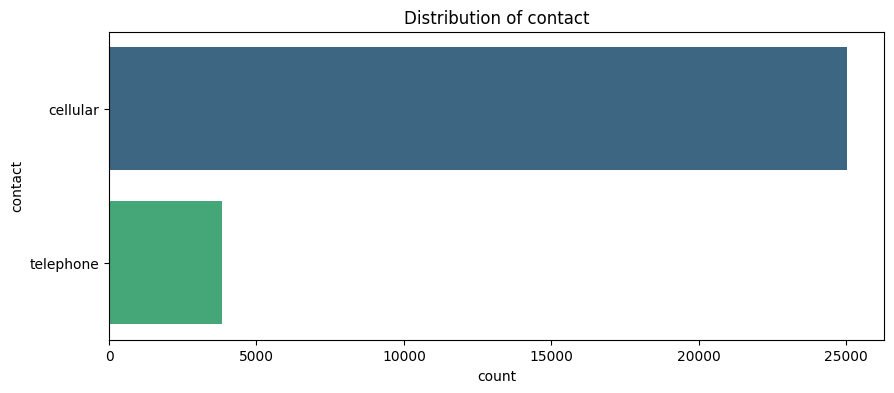

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


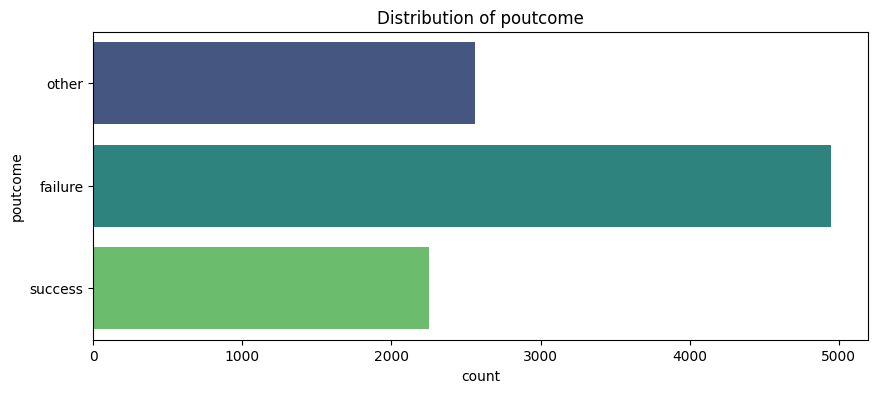

<ipython-input-8-6a1e029a16b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=train, palette='viridis')


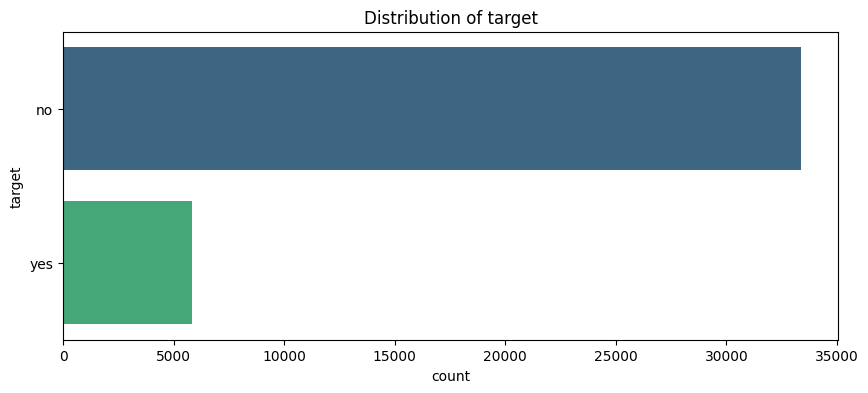

In [ ]:
categorical_columns = train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=train, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.show()

plotting correlation

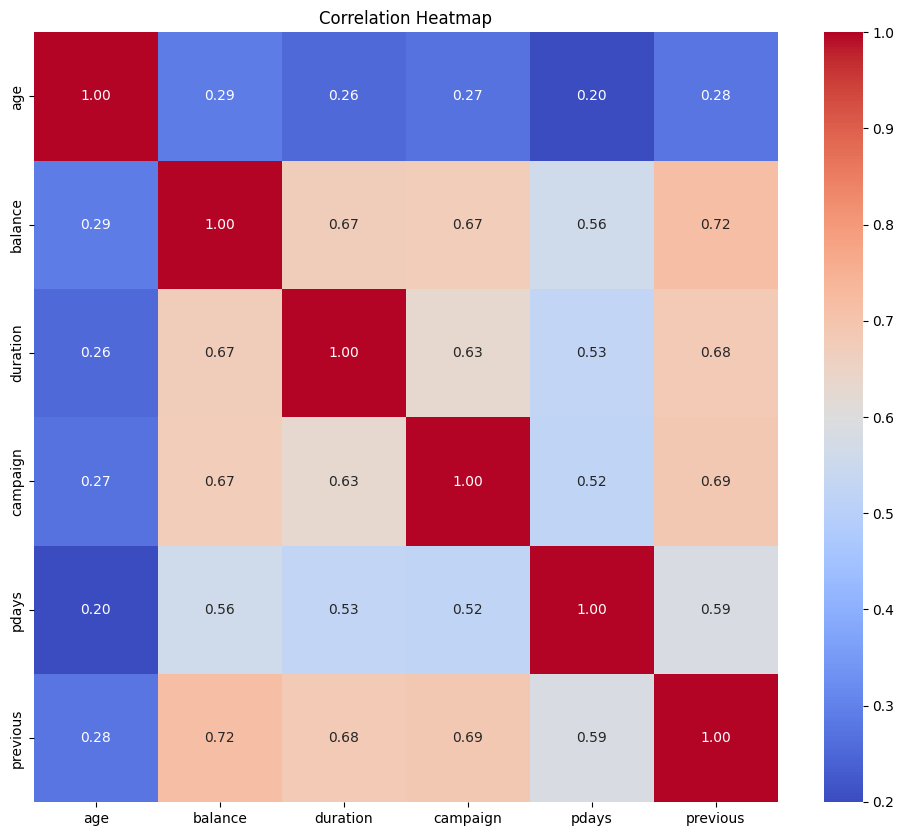

In [ ]:
numeric_df = train.select_dtypes(include=['float64', 'int64'])

#plotting correlation
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Explore each categorical feature's relationship with the target variable

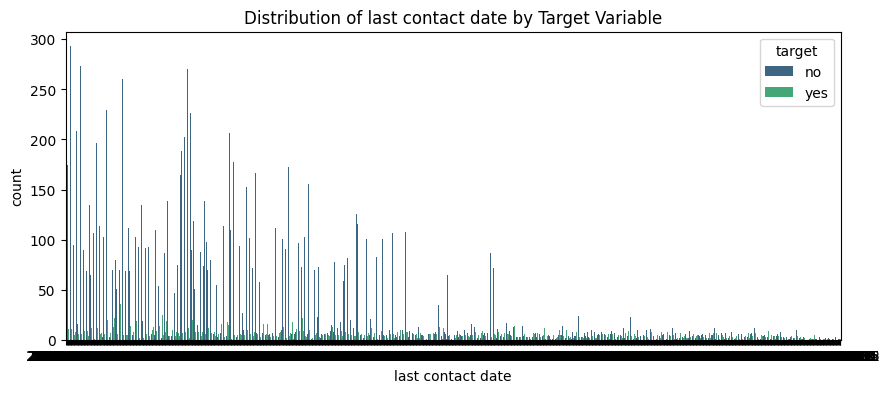

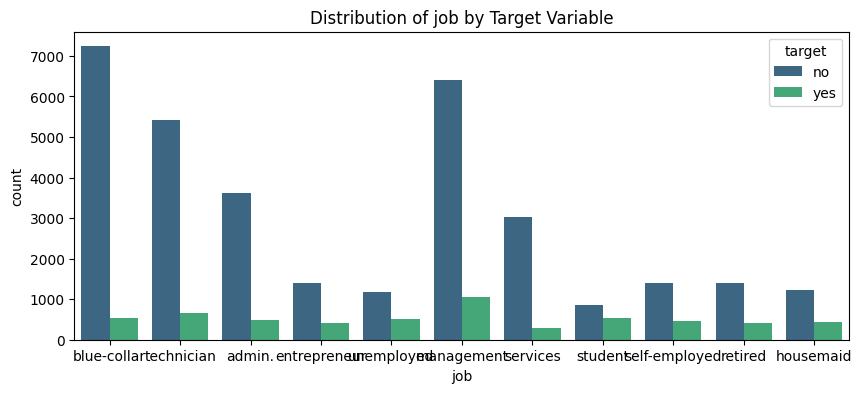

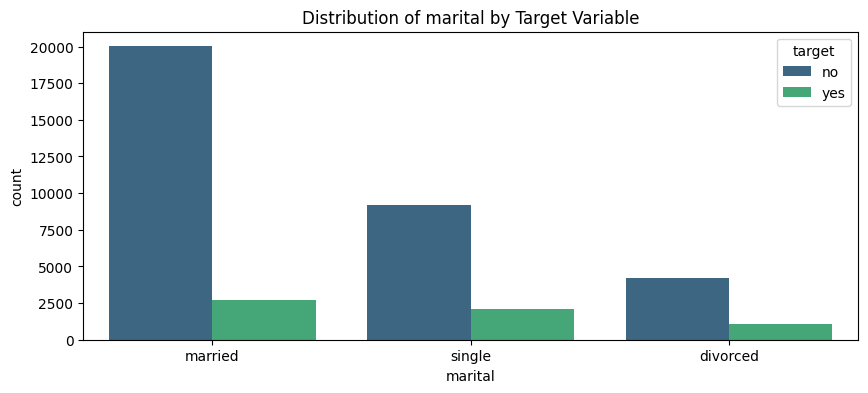

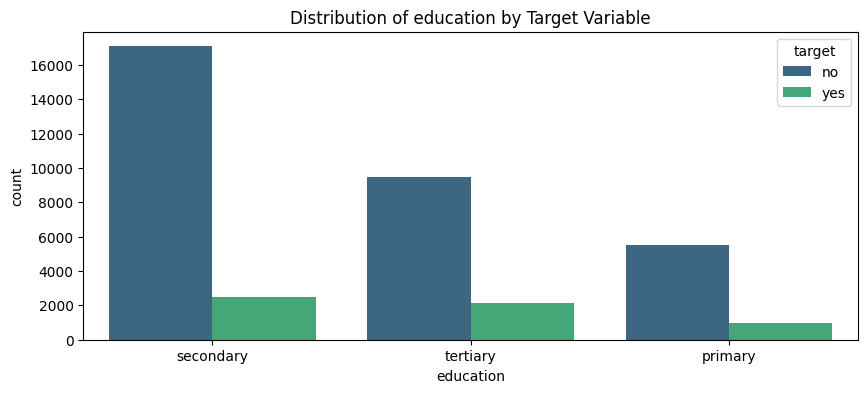

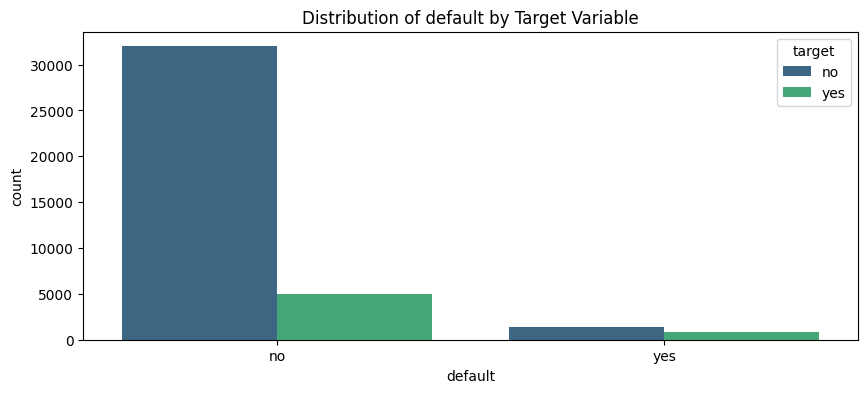

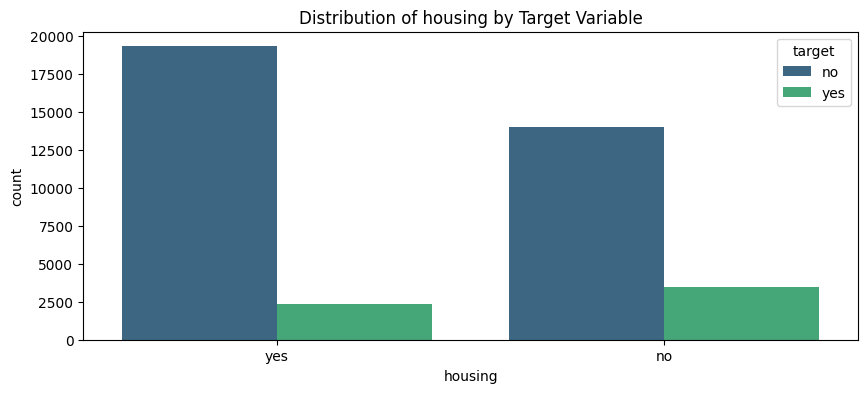

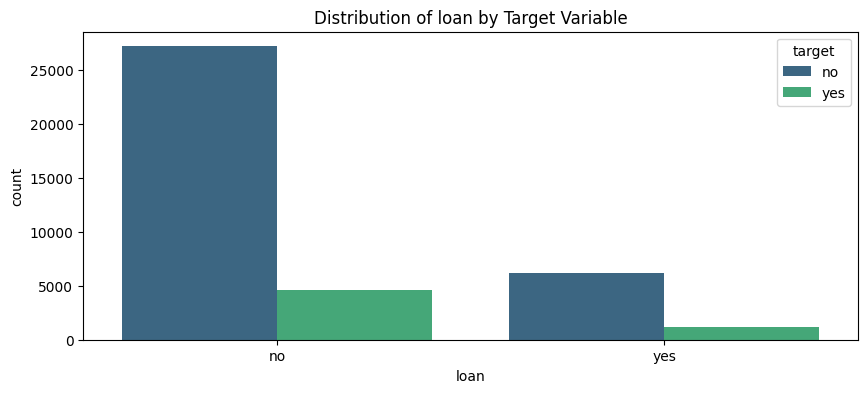

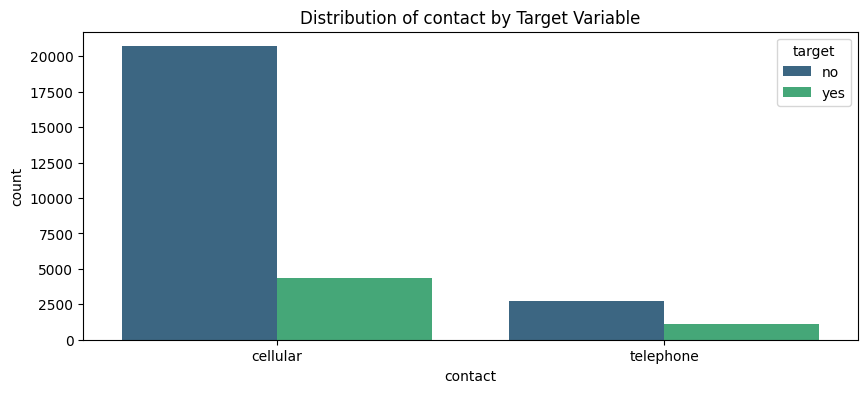

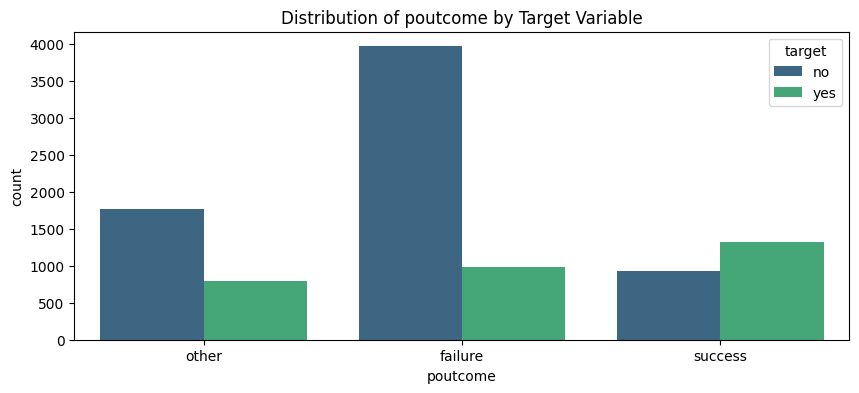

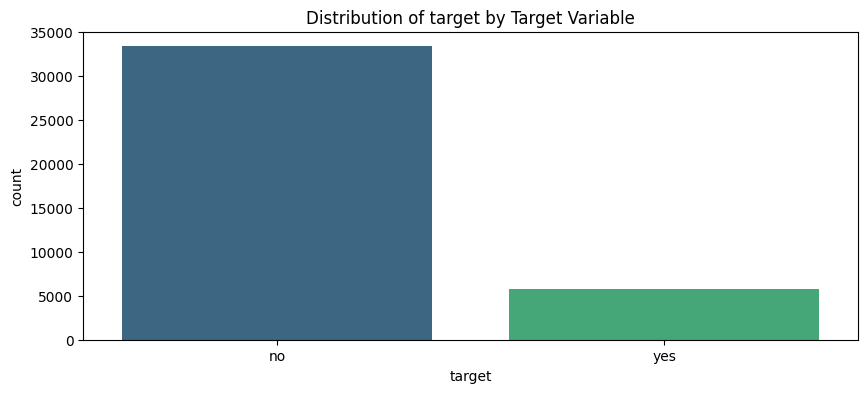

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='target', data=train, palette='viridis')
    plt.title(f"Distribution of {col} by Target Variable")
    plt.show()

Defining Feature Engineering functions

In [ ]:
def create_features(df):
    df = df.copy()
    # Creatting age groups
    df['age_group'] = pd.cut(df['age'],
                            bins=[0, 20, 30, 40, 50, 60, 100],
                            labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

    # Creating balance groups
    df['balance_group'] = pd.qcut(df['balance'], q=5, labels=['very_low', 'low', 'medium', 'high', 'very_high'])

    # Create campaign intensity feature
    df['campaign_intensity'] = df['campaign'] / (df['pdays'].replace(-1, 999) + 1)
    df['campaign_intensity'] = df['campaign_intensity'].clip(upper=df['campaign_intensity'].quantile(0.99))

    # Create contact rate
    df['contact_rate'] = df['previous'] / (df['pdays'].replace(-1, 999) + 1)
    df['contact_rate'] = df['contact_rate'].clip(upper=df['contact_rate'].quantile(0.99))

    # Create interaction features
    df['age_balance'] = df['age'] * df['balance']
    df['age_balance'] = df['age_balance'].clip(upper=df['age_balance'].quantile(0.99))

    df['duration_campaign'] = df['duration'] * df['campaign']
    df['duration_campaign'] = df['duration_campaign'].clip(upper=df['duration_campaign'].quantile(0.99))

    # Replace any remaining infinities with NaN
    df = df.replace([np.inf, -np.inf], np.nan)

    return df

# Process datetime

In [ ]:
train['last contact date'] = pd.to_datetime(train['last contact date'])
train['year'] = train['last contact date'].dt.year
train['month'] = train['last contact date'].dt.month
train['weekday'] = train['last contact date'].dt.weekday
train.drop(columns=['last contact date'], inplace=True)

In [ ]:
train = create_features(train)

# Splitting features and target

In [ ]:
X = train.drop(columns=['target', 'year'])
y = (train['target'] == 'yes').astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Define column groups
num = ['age', 'previous', 'pdays', 'duration', 'balance',
       'campaign_intensity', 'contact_rate', 'age_balance', 'duration_campaign']
ordinal_cat = ['education']
nominal_cat = ['marital', 'housing', 'loan', 'default', 'weekday', 'contact',
               'job', 'poutcome', 'age_group', 'balance_group']

Creating Pipelines

In [ ]:
numpipe = Pipeline([
    ('imputer1', SimpleImputer(strategy='median')),
    ('scaler1', StandardScaler())
])
ord_pipe = Pipeline([
    ('imputer2', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder2', OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]))
])
nom_pipe = Pipeline([
    ('imputer3', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot_encoder3', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numpipe, num),
        ('ordinal', ord_pipe, ordinal_cat),
        ('nominal', nom_pipe, nominal_cat)
    ],
    remainder='passthrough'
)

Fit preprocessor and transform data

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

Creating and training model

In [ ]:
model = XGBClassifier(
    random_state=42,
    scale_pos_weight=2.8,
    colsample_bytree=0.75,
    learning_rate=0.05,
    max_depth=7,
    n_estimators=300,
    subsample=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    objective='binary:logistic',
    eval_metric='auc',
    early_stopping_rounds=20
)
model.fit(
    X_train_transformed,
    y_train,
    eval_set=[(X_test_transformed, y_test)],
    verbose=True
)

[0]	validation_0-auc:0.87778
[1]	validation_0-auc:0.89306
[2]	validation_0-auc:0.89678
[3]	validation_0-auc:0.89598
[4]	validation_0-auc:0.90274
[5]	validation_0-auc:0.90407
[6]	validation_0-auc:0.90420
[7]	validation_0-auc:0.90389
[8]	validation_0-auc:0.90336
[9]	validation_0-auc:0.90478
[10]	validation_0-auc:0.90449
[11]	validation_0-auc:0.90510
[12]	validation_0-auc:0.90595
[13]	validation_0-auc:0.90657
[14]	validation_0-auc:0.90693
[15]	validation_0-auc:0.90731
[16]	validation_0-auc:0.90761
[17]	validation_0-auc:0.90811
[18]	validation_0-auc:0.90862
[19]	validation_0-auc:0.90864
[20]	validation_0-auc:0.90884
[21]	validation_0-auc:0.90879
[22]	validation_0-auc:0.90848
[23]	validation_0-auc:0.90849
[24]	validation_0-auc:0.90855
[25]	validation_0-auc:0.90894
[26]	validation_0-auc:0.90895
[27]	validation_0-auc:0.90892
[28]	validation_0-auc:0.90925
[29]	validation_0-auc:0.90991
[30]	validation_0-auc:0.90997
[31]	validation_0-auc:0.91029
[32]	validation_0-auc:0.91014
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model Evaluation on Training and Test Sets

In [ ]:
print("\nTraining Set Results:")
y_pred_train = model.predict(X_train_transformed)
print(classification_report(y_train, y_pred_train))

print("\nTest Set Results:")
y_pred_test = model.predict(X_test_transformed)
print(classification_report(y_test, y_pred_test))


Training Set Results:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     26707
           1       0.58      0.87      0.70      4661

    accuracy                           0.89     31368
   macro avg       0.78      0.88      0.81     31368
weighted avg       0.92      0.89      0.90     31368


Test Set Results:
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      6677
           1       0.52      0.79      0.63      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.83      0.77      7843
weighted avg       0.89      0.86      0.87      7843



Creating Time-Based Features from 'Last Contact Date'

In [ ]:
test['last contact date'] = pd.to_datetime(test['last contact date'])
test['year'] = test['last contact date'].dt.year
test['month'] = test['last contact date'].dt.month
test['weekday'] = test['last contact date'].dt.weekday
test.drop(columns=['last contact date'], inplace=True)


In [ ]:
test = create_features(test)

In [ ]:
test = test.drop(columns=['year'])

In [ ]:
test_transformed = preprocessor.transform(test)

Applying Logistic Regression

In [ ]:
log_reg_model = LogisticRegression(random_state=42)
print("Training Logistic Regression...")
log_reg_model.fit(X_train_transformed, y_train)

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred_log_reg = log_reg_model.predict(X_test_transformed)


In [ ]:
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(f"Logistic Regression Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")

Logistic Regression Accuracy: 0.8656
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.61      0.27      0.37      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.62      0.65      7843
weighted avg       0.84      0.87      0.84      7843



Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
print("Training Random Forest...")
rf_model.fit(X_train_transformed, y_train)

Training Random Forest...


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_transformed)

In [ ]:
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")


Random Forest Accuracy: 0.8705
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      6677
           1       0.59      0.42      0.49      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.68      0.71      7843
weighted avg       0.86      0.87      0.86      7843



XGBoost

In [ ]:
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=2.8)
print("Training XGBoost...")
xgb_model.fit(X_train_transformed, y_train)


Training XGBoost...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_transformed)

In [ ]:
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(f"XGBoost Classification Report:\n{classification_report(y_test, y_pred_xgb)}")

XGBoost Accuracy: 0.8618
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      6677
           1       0.53      0.71      0.60      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.80      0.76      7843
weighted avg       0.88      0.86      0.87      7843



Applying SVM

In [ ]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_transformed, y_train)

y_pred_svm = svm_model.predict(X_test_transformed)
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"SVM Classification Report:\n{classification_report(y_test, y_pred_svm)}")


SVM Accuracy: 0.8620
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.58      0.27      0.37      1166

    accuracy                           0.86      7843
   macro avg       0.73      0.62      0.64      7843
weighted avg       0.84      0.86      0.84      7843



Applying haperparameter tuning in logistic regression

In [ ]:
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga']
}

log_reg_model = LogisticRegression(random_state=42, max_iter=500)

# GridSearchCV
grid_log_reg = GridSearchCV(log_reg_model, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
print("Tuning Logistic Regression...")
grid_log_reg.fit(X_train_transformed, y_train)


Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_transformed)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Best Logistic Regression Params: {grid_log_reg.best_params_}")
print(f"Logistic Regression Accuracy: {log_reg_acc:.4f}")
print(f"Logistic Regression Classification Report:\n{classification_report(y_test, y_pred_log_reg)}")


Best Logistic Regression Params: {'C': 0.1, 'penalty': None, 'solver': 'saga'}
Logistic Regression Accuracy: 0.8657
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6677
           1       0.61      0.27      0.37      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.62      0.65      7843
weighted avg       0.84      0.87      0.84      7843



Applying hyperparameter tuning in Random Forest

In [ ]:
'''rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
print("Tuning Random Forest...")
grid_rf.fit(X_train_transformed, y_train)'''


'rf_params = {\n    \'n_estimators\': [100, 200, 300],       \n    \'max_depth\': [None, 10, 20, 30],       \n    \'min_samples_split\': [2, 5, 10],       \n    \'min_samples_leaf\': [1, 2, 4],        \n    \'bootstrap\': [True, False]             \n}\nrf_model = RandomForestClassifier(random_state=42)\n\ngrid_rf = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring=\'accuracy\', n_jobs=-1, verbose=2)\nprint("Tuning Random Forest...")\ngrid_rf.fit(X_train_transformed, y_train)'

In [ ]:
# Get the best model and evaluate
'''best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Best Random Forest Params: {grid_rf.best_params_}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")'''


'best_rf = grid_rf.best_estimator_\ny_pred_rf = best_rf.predict(X_test)\nrf_acc = accuracy_score(y_test, y_pred_rf)\nprint(f"Best Random Forest Params: {grid_rf.best_params_}")\nprint(f"Random Forest Accuracy: {rf_acc:.4f}")\nprint(f"Random Forest Classification Report:\n{classification_report(y_test, y_pred_rf)}")'

Hyperparameter tuning for XGBoost

In [ ]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params,
                                n_iter=50, scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)
print("Tuning XGBoost...")
random_xgb.fit(X_train, y_train)'''

'from xgboost import XGBClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Define hyperparameter grid\nxgb_params = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [3, 5, 7, 10],\n    \'learning_rate\': [0.01, 0.1, 0.2, 0.3],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'gamma\': [0, 0.1, 0.2],\n    \'reg_alpha\': [0, 0.1, 1],\n    \'reg_lambda\': [1, 1.5, 2]\n}\n\nxgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=\'logloss\')\n\nrandom_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_params, \n                                n_iter=50, scoring=\'accuracy\', cv=5, verbose=2, random_state=42, n_jobs=-1)\nprint("Tuning XGBoost...")\nrandom_xgb.fit(X_train, y_train)'

In [ ]:
# Get the best model and evaluate
'''best_xgb = random_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"Best XGBoost Params: {random_xgb.best_params_}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(f"XGBoost Classification Report:\n{classification_report(y_test, y_pred_xgb)}")'''

'best_xgb = random_xgb.best_estimator_\ny_pred_xgb = best_xgb.predict(X_test)\nxgb_acc = accuracy_score(y_test, y_pred_xgb)\nprint(f"Best XGBoost Params: {random_xgb.best_params_}")\nprint(f"XGBoost Accuracy: {xgb_acc:.4f}")\nprint(f"XGBoost Classification Report:\n{classification_report(y_test, y_pred_xgb)}")'

### Model Performance Comparison

The bar chart below compares the accuracy of three models: Logistic Regression, Random Forest, and Support Vector Machine (SVM).

- From the visualization,**Random Forest** model performs better than both Logistic Regression and SVM in terms of accuracy.
- This indicates that the ensemble nature of Random Forest allows it to capture the patterns in the data more effectively than the other two models.
- Logistic Regression shows a relatively lower accuracy, which suggests that the relationship between features and the target may not be entirely linear.
- SVM performs moderately well but does not reach the accuracy of Random Forest.


<ipython-input-38-f2ac602e4a61>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')


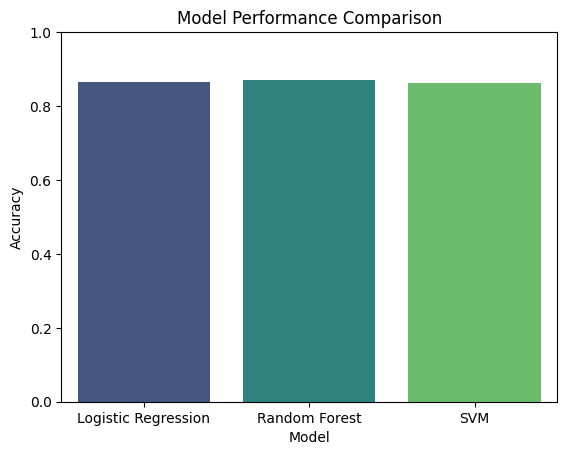

In [ ]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
model_accuracies = [log_reg_acc, rf_acc, svm_acc]

# Create a DataFrame for visualization
import pandas as pd
data = pd.DataFrame({'Model': model_names, 'Accuracy': model_accuracies})

# Plot the bar chart
sns.barplot(x='Model', y='Accuracy', data=data, palette='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.show()


In [ ]:
# Make predictions on test data
test_predictions = model.predict(test_transformed)
test_probabilities = model.predict_proba(test_transformed)

# Create submission dataframe
submission = pd.DataFrame({
    'id': test.index,
    'target': ['yes' if pred == 1 else 'no' for pred in test_predictions]
})
print("\nFirst few predictions:")
submission.to_csv('submission.csv', index=False)
submission



First few predictions:


,id,target
0,0,no
1,1,no
2,2,no
3,3,no
4,4,yes
...,...,...
9995,9995,no
9996,9996,yes
9997,9997,yes
9998,9998,no
